In [54]:
import pandas as pd
import numpy as np
#import cufflinks as cf
import matplotlib.pyplot as plt
%matplotlib inline

I started initially looking at the wind farm data set, but all the variables were normalized, so I wasn't sure how much 'describing' of the data I could do with these...decided to switch to another data set.

In [2]:
wind_farms = pd.read_csv('wind_train.csv')

In [3]:
wind_farms.head()

,date,wp1,wp2,wp3,wp4,wp5,wp6,wp7
0,2009070100,0.045,0.233,0.494,0.105,0.056,0.118,0.051
1,2009070101,0.085,0.249,0.257,0.105,0.066,0.066,0.051
2,2009070102,0.020,0.175,0.178,0.033,0.015,0.026,0.000
3,2009070103,0.060,0.085,0.109,0.022,0.010,0.013,0.000
4,2009070104,0.045,0.032,0.079,0.039,0.010,0.000,0.000


,date,wp1,wp2,wp3,wp4,wp5,wp6,wp7
count,1.875700e+04,18757.000000,18757.000000,18757.000000,18757.000000,18757.000000,18757.000000,18757.000000
mean,2.010231e+09,0.252388,0.265983,0.334571,0.286173,0.272584,0.286774,0.290542
std,8.803362e+05,0.246381,0.273205,0.318636,0.295069,0.294221,0.283023,0.305272
min,2.009070e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.010011e+09,0.050000,0.042000,0.069000,0.022000,0.040000,0.053000,0.025000
50%,2.010073e+09,0.175000,0.164000,0.217000,0.182000,0.157000,0.184000,0.177000
75%,2.011033e+09,0.381000,0.423000,0.563000,0.474000,0.415000,0.461000,0.505000
max,2.012063e+09,0.947000,0.989000,0.978000,0.992000,0.966000,0.974000,0.960000


I looked at the oil pipeline accidents data, which seemed more interesting and more suited for the task.

Describe your dataset. Describe and explore your dataset in the initial section of your Report. What does your data contain and what is its background? Where does it come from? Why is it interesting or significant? Conduct summary statistics and produce visualizations for the particular variables from the dataset that you will use.

Ask and answer analytic questions. Ask three analytic questions and answer each one with a combination of statistics and visualizations. These analytic questions can focus on individuals behaviors or comparisons of the population.

Propose further research. Lastly, make a proposal for a realistic future research project on this dataset that would use some data science techniques you'd like to learn in the bootcamp. Just like your earlier questions, your research proposal should present one or more clear questions. Then you should describe the techniques you would apply in order to arrive at an answer.

## Description of the data set
This data set is a record of oil pipeline accidents that occurred between 2010 and 2017. It records injuries and fatalities, the causes of the accidents, and also the costs associated with pipeline leaks and spills.

The dataset is owned by and maintained by the Department of Transportation's Pipeline and Hazardours Materials Safety Administration and was last updated in 2017, which means accidents occuring after that date are not included.

This is an increadibly interesting set of data since it provides a glimpse into some of the hazards surrounding the maintenance of the pipeline.

## First pass through the data - summary statistics and first look at the variables

The years indicated in the data description do appear in the data set.

In [5]:
#confirm that there is data for all of the years indicated.
pipeline['Accident Year'].unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017], dtype=int64)

### An initial quick look at the data:

In [13]:
pipeline.head()

,Report Number,Supplemental Number,Accident Year,Accident Date/Time,Operator ID,Operator Name,Pipeline/Facility Name,Pipeline Location,Pipeline Type,Liquid Type,...,Other Fatalities,Public Fatalities,All Fatalities,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs
0,20100016,17305,2010,1/1/2010 7:15 AM,32109,ONEOK NGL PIPELINE LP,KINDER MORGAN JCT,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",...,NaN,NaN,NaN,110.0,1517.0,0.0,0.0,0.0,0.0,1627
1,20100254,17331,2010,1/4/2010 8:30 AM,15786,PORTLAND PIPELINE CORP,24-INCH MAIN LINE,ONSHORE,ABOVEGROUND,CRUDE OIL,...,NaN,NaN,NaN,4000.0,8.0,0.0,0.0,0.0,0.0,4008
2,20100038,17747,2010,1/5/2010 10:30 AM,20160,"PETROLOGISTICS OLEFINS, LLC",NaN,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",...,NaN,NaN,NaN,0.0,200.0,0.0,0.0,0.0,0.0,200
3,20100260,18574,2010,1/6/2010 7:30 PM,11169,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",SUPERIOR TERMINAL,ONSHORE,UNDERGROUND,CRUDE OIL,...,NaN,NaN,NaN,200.0,40.0,0.0,11300.0,0.0,0.0,11540
4,20100030,16276,2010,1/7/2010 1:00 PM,300,"PLAINS PIPELINE, L.P.",RED RIVER EAST,ONSHORE,UNDERGROUND,CRUDE OIL,...,NaN,NaN,NaN,20000.0,150.0,0.0,7500.0,2000.0,0.0,29650


The data set includes 48 columns or variables and has some missing data, indicated by the presence of NaN values in the data set. It also seems like each accident is associated with a report number, so there is potential to get details for specific accidents that may not be present in this data set, if the reports can be requested.

It's interesting that the fatalities are broken down into categories that include public and 'other' fatalities and it may be interesting to compare these categories to see who is effected more during a pipeline accident. The costs are also broken down really well and include damages to property (the pipeline), damage to public/private property, costs of the emergency response, costs for environmental remediation, and also additional, uncategorized costs.

This data set appears really robust and has enough information in it to ask some intereting and insightful questions.

### Examining dimensions of the data and looking at some summary statistics:

In [14]:
pipeline.shape

(2795, 48)

This data set has 48 variables and 2,795 observations, which means that there were 2,795 accidents that occurred on the pipeline between 2010 and 2017.

In [15]:
pipeline.describe()

,Report Number,Supplemental Number,Accident Year,Operator ID,Accident Latitude,Accident Longitude,Unintentional Release (Barrels),Intentional Release (Barrels),Liquid Recovery (Barrels),Net Loss (Barrels),...,Other Fatalities,Public Fatalities,All Fatalities,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs
count,2.795000e+03,2795.000000,2795.000000,2795.000000,2795.000000,2795.000000,2795.000000,1209.000000,2795.000000,2795.000000,...,8.000000,8.000000,8.00000,2.788000e+03,2.791000e+03,2.785000e+03,2.789000e+03,2.787000e+03,2.779000e+03,2.795000e+03
mean,2.013293e+07,19433.319499,2013.187835,21388.476565,35.781608,-95.682691,207.245843,238.533623,75.051792,132.194050,...,0.125000,0.625000,1.25000,1.122963e+05,9.805299e+03,2.512195e+04,2.918911e+05,3.628094e+05,3.435604e+04,8.340332e+05
std,1.982098e+04,1724.815370,1.972102,12430.973428,5.652599,12.328430,1368.667813,2781.771453,546.188247,1185.019252,...,0.353553,0.744024,0.46291,8.709947e+05,6.384075e+04,5.243581e+05,4.617076e+06,1.206887e+07,6.191235e+05,1.657830e+07
min,2.010000e+07,15072.000000,2010.000000,300.000000,18.448010,-158.099930,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.00000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.012004e+07,17978.500000,2012.000000,11169.000000,30.909375,-100.587636,0.480000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.00000,1.000000e+02,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.039500e+03
50%,2.013037e+07,19502.000000,2013.000000,26041.000000,34.925440,-95.488870,2.000000,0.000000,0.740000,0.000000,...,0.000000,0.500000,1.00000,3.000000e+03,1.000000e+02,0.000000e+00,2.520000e+03,8.000000e+02,0.000000e+00,2.312900e+04
75%,2.015023e+07,20996.500000,2015.000000,31618.000000,40.264062,-91.089463,20.000000,0.000000,8.000000,2.000000,...,0.000000,1.000000,1.25000,2.500000e+04,7.000000e+02,0.000000e+00,1.550000e+04,1.500000e+04,0.000000e+00,1.172325e+05
max,2.017003e+07,22049.000000,2017.000000,99043.000000,70.261265,104.263399,30565.000000,70191.000000,18245.000000,30565.000000,...,1.000000,2.000000,2.00000,2.700000e+07,1.417839e+06,2.300000e+07,1.770000e+08,6.350000e+08,2.235000e+07,8.405261e+08


This initial general summary of the variables in the data set is starting to reveal a few interesting things. First, it seems like there is a large range of the volumen (in barrels) of the liquid released (both intentional and unintentional release) and the range of the volume of the liquid recovered is much narrower. This suggests that there is still a lot of room to improve in the recovery methods.

The number of fatalities is fairly low, considering that the period spans eight years, which suggests that these accidents do not have a large impact on the number of human lives lost. Unfortunately, this data set does not quantify the impact to wild life (both in the number of animals killed or the extent of the impact to the animal habitats). The impact on wild life from these accidents would be a really intersting additional component to add to the analytics of this data set!

It is also noteworthy to mention that the actual costs associated with the accidents are wildly different. The range is from a few thousand to millions and it would be worthwhile to examine the factors that may drive up the costs associated with the accident.

### Some preliminary examination of trends:

#### Examine trends of different types of liquids released over the years.

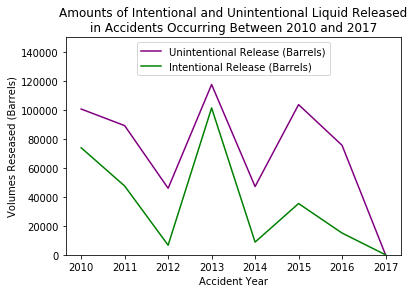

In [40]:
sum_by_year = pipeline.groupby(['Accident Year'])['Unintentional Release (Barrels)',
                                                  'Intentional Release (Barrels)'].sum().reset_index()
sum_by_year.plot(x = 'Accident Year', 
                 y = ['Unintentional Release (Barrels)', 'Intentional Release (Barrels)'], 
                 color = ['purple', 'green'])
plt.title('Amounts of Intentional and Unintentional Liquid Released\nin Accidents Occurring Between 2010 and 2017')
plt.ylabel("Volumes Reseased (Barrels)")
plt.ylim(0, 150000)
plt.legend(loc = 'upper center')


Looking at the volumes of liquid released shows that both intentional and unintentional released volumes largely follow the same patterns over the years. Specifically, from 2010 to 2014 the patterns of both types of releases are very similar and differ in the magniture of the volume. During those 5 years it seems like there was a large correlation between the two types of releases - when the intentional release volume went up/down, so did the unintentional release volume. The pattern continues past 2014; however, there is slightly less concordance between the two release types. Although the unintentional release trend follows the trend of the intentional release, the volumes of the unintentional release are much larger than the volumes of the intentional release during those years.

#### Examination of pipeline locations where accidents took place

In [71]:
# https://plot.ly/pandas/pie-charts/
# https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

##location = pipeline.groupby('Pipeline Type').size().reset_index(name = 'Counts of Accidents')
##location.plot(kind = 'pie',
  ##            y = 'Counts of Accidents',
    ##          figsize = (8, 8),
      ##        #labels = location['Aboveground', 'Tank', 'Transition Area', 'Underground']
        ##      #labels = "Pipeline Type"
          ##    labels = location.index
            ##  )


In [72]:
##location['Counts of Accidents'].plot(kind = 'pie',
  ##                                   figsize = (8, 8),
    ##                                 labels = "Pipeline Type")

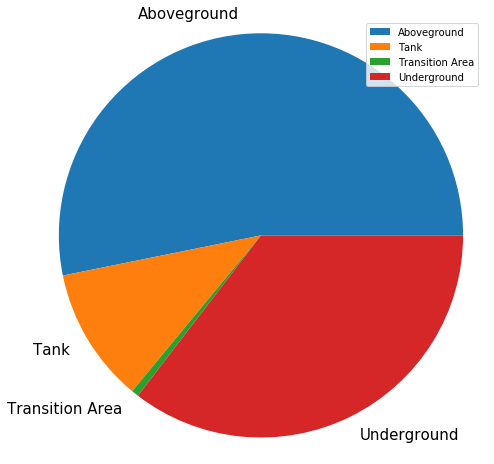

In [70]:
#https://stackoverflow.com/questions/35488666/matplotlib-pandas-pie-chart-label-mistakes
group_names = ['Aboveground', 'Tank', 'Transition Area', 'Underground']
counts = pd.Series([1479, 301, 16, 985],
                   index = ['Aboveground', 'Tank', 'Transition Area', 'Underground'])
counts.plot(kind = 'pie',
            fontsize = 15,
            figsize = (8, 8))
plt.axis('equal')
plt.ylabel('')
plt.legend(labels = counts.index, loc = 'best')
plt.show()

In [47]:
print(location)

     Pipeline Type  Counts of Accidents
0      ABOVEGROUND                 1475
1             TANK                  301
2  TRANSITION AREA                   16
3      UNDERGROUND                  985


More than half of the accidents recorded in this data set occur at above ground locations of the pipeline. The second most frequent location of accidents on the pipeline occur under ground (about 30%). There are also accidents happening in tanks and a smattering of accidents occuring in what is termed the 'transition' area, which may refer to a point of transfer from the pipe to a tank or another container.

## Delving into the data for a deeper analysis

### Are there years or specific areas that stand out from the rest of their respective group in the number of accidents?

#### What is the year where the most number of accidents took place? The least?

In [74]:
yearly_accidents = pipeline.groupby('Accident Year').size().reset_index(name = 'Number of Accidents')

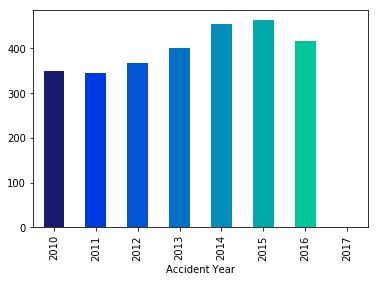

In [80]:
colors = ['#191970', '#0038E2', '#0055D4', '#0071C6', '#008DB8', '#00AAAA',
          '#00C69C', '#00FF80']
yearly_accidents.plot(kind = 'bar',
                      x = 'Accident Year',
                      y = 'Number of Accidents',
                      legend = False,
                      color = colors
                     )

2015 is the year with the most accidents, followed closely by 2014. The year with the least accidents (only 2!) is 2017.

#### Is the trend showing that most accidents occur above ground, which is observed in the data at a high level, also present from year to year?

Count the number of accidents occurring within each of the four categorizations by year.

In [43]:
years = pipeline.groupby(['Accident Year',
                          'Pipeline Type']).size().reset_index(name = 'Number of Accidents')

print(years)

    Accident Year    Pipeline Type  Number of Accidents
0            2010      ABOVEGROUND                  166
1            2010             TANK                   37
2            2010  TRANSITION AREA                    3
3            2010      UNDERGROUND                  140
4            2011      ABOVEGROUND                  174
5            2011             TANK                   25
6            2011  TRANSITION AREA                    4
7            2011      UNDERGROUND                  139
8            2012      ABOVEGROUND                  191
9            2012             TANK                   47
10           2012  TRANSITION AREA                    1
11           2012      UNDERGROUND                  124
12           2013      ABOVEGROUND                  200
13           2013             TANK                   33
14           2013  TRANSITION AREA                    1
15           2013      UNDERGROUND                  166
16           2014      ABOVEGROUND              

Graph the counts of different accident types over the years.

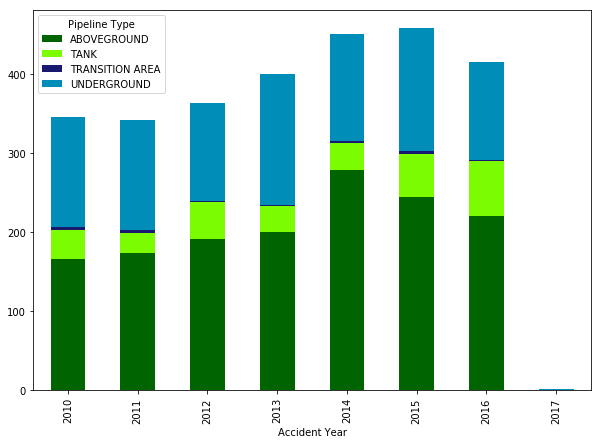

In [89]:

colors = ["darkgreen", "lawngreen", '#191970', '#008DB8']
pivot_years = years.pivot(index = 'Accident Year', columns = 'Pipeline Type', values = 'Number of Accidents')
#pivot_years
pivot_years.plot.bar(stacked = True, color = colors, figsize = (10, 7) )



#pivot_df = df.pivot(index='Year', columns='Month', values='Value')
#pivot_df

#Note: .loc[:,['Jan','Feb', 'Mar']] is used here to rearrange the layer ordering
#pivot_df.loc[:,['Jan','Feb', 'Mar']].plot.bar(stacked=True, color=colors, figsize=(10,7))

While in the data overall, above ground accidents predominate, there are a couple of years where the underground accidents come very close to the number of above ground accidents. This is the case for years 2010 and 2011, where the values of both types are of accidents are much closer than they are for the other years, where the above ground accidents dominate the counts. 2017 has only two accidents, so is not really good in terms of comparison purposes.

#### How much of the liquid is routinely recovered from accidents? Are some years better than others in terms of volumes recovered? Are some areas better?

#### Are costs correlated to the size of the accident in barrels lost or are they more correlated to the amount of liquid that is recovered?

- question to ask : are costs correlated to the size of the accident in barrels lost or are they more correlated to the amount of liquid that is recovered? 

- are there some years where the number of accidents much larger than in other years?

- how much of the liqued is routinely recovered from accidents? Are there some areas that consistently recover more liquid after the accident? (copute the percent that is recovered for each accidnet, then get an average recovery rate by areas).